In [1]:
# Initialization
from matplotlib import pyplot as plt
%matplotlib inline

import logging

from dolfin import *

from unconstrainedMinimization import InexactNewtonCG

logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
set_log_active(False)

In [2]:
# Generate mesh for the unit circle domain.
import mshr

mesh = mshr.generate_mesh(mshr.Circle(Point(0., 0.), 1.), 40)


def solve(mesh, A, f):
    # Define the finite element space
    Vh = FunctionSpace(mesh, "Lagrange", 2)

    u = Function(Vh)
    u_hat = TestFunction(Vh)
    u_tilde = TrialFunction(Vh)

    # Define the energy functional
    beta = Constant(100)

    E = (Constant(.5) * beta * u * u * ds +
         Constant(.5) * inner(A * nabla_grad(u), nabla_grad(u)) * dx -
         f * u * dx)

    grad = (beta * u * u_hat * ds +
            inner(A * nabla_grad(u), nabla_grad(u_hat)) * dx -
            f * u_hat * dx)

    H = (beta * u_tilde * u_hat * ds +
         inner(A * nabla_grad(u_tilde), nabla_grad(u_hat)) * dx)

    solver = InexactNewtonCG()
    solver.parameters["rel_tolerance"] = 1e-6
    solver.parameters["abs_tolerance"] = 1e-9
    solver.parameters["gdu_tolerance"] = 1e-18
    solver.parameters["max_iter"] = 1000
    solver.parameters["c_armijo"] = 1e-5
    solver.parameters["print_level"] = 1
    solver.parameters["max_backtracking_iter"] = 10

    solver.solve(E, u, grad, H)
    return u

 It          Energy           ||g||          (g,du)           alpha          tol_cg   cg_it
  0   -1.653052e-01    7.748933e-01   -3.306104e-01    1.000000e+00    5.000000e-01       1
  1   -1.840492e-01    6.347577e-02   -3.748798e-02    1.000000e+00    5.000000e-01       2
  2   -1.841238e-01    9.637791e-03   -1.492951e-04    1.000000e+00    5.000000e-01       1
  3   -1.841282e-01    6.900867e-04   -8.675726e-06    1.000000e+00    2.057346e-01       2
  4   -1.841282e-01    1.216167e-05   -3.919345e-08    1.000000e+00    5.505166e-02       3
  5   -1.841282e-01    5.558890e-08   -1.217241e-11    1.000000e+00    7.308279e-03       4
Norm of the gradient less than tolerance
Inexact Newton CG converged in  5 nonlinear iterations and  13 linear iterations.
Final norm of the gradient 5.5588903872713326e-08
Value of the cost functional -0.18412818919049445


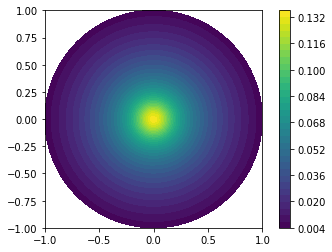

In [5]:
A1 = Constant(((10., 0.), (0., 10.)))
f = Expression("100*exp(-100*(x[0]*x[0] + x[1]*x[1]))", degree=5)
u1 = solve(mesh, A1, f)
c = plot(u1)
plt.colorbar(c)
plt.savefig('hw3/p3-A1.png')

 It          Energy           ||g||          (g,du)           alpha          tol_cg   cg_it
  0   -4.702879e-02    1.074243e+00   -9.405757e-02    1.000000e+00    5.000000e-01       1
  1   -9.960844e-02    7.254363e-01   -1.051593e-01    1.000000e+00    5.000000e-01       2
  2   -1.080797e-01    8.009593e-01   -1.694257e-02    1.000000e+00    5.000000e-01       1
  3   -1.279888e-01    2.661667e-01   -3.981815e-02    1.000000e+00    5.000000e-01       4
  4   -1.292688e-01    5.069499e-02   -2.559925e-03    1.000000e+00    5.000000e-01       5
  5   -1.293633e-01    2.217784e-02   -1.890143e-04    1.000000e+00    4.718469e-01       4
  6   -1.293843e-01    4.025904e-03   -4.200860e-05    1.000000e+00    3.120888e-01       6
  7   -1.293848e-01    9.302344e-04   -9.597872e-07    1.000000e+00    1.329690e-01       5
  8   -1.293848e-01    3.774659e-05   -7.040364e-08    1.000000e+00    6.391676e-02       9
  9   -1.293848e-01    2.201868e-07   -1.050324e-10    1.000000e+00    1.287530e

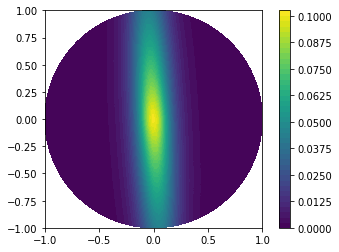

In [6]:
A2 = Constant(((1., -5.), (-5., 100.)))
f = Expression("100*exp(-100*(x[0]*x[0] + x[1]*x[1]))", degree=5)
u2 = solve(mesh, A2, f)
c = plot(u2)
plt.colorbar(c)
plt.savefig('hw3/p3-A2.png')